In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Explorationand understanding
1.1 Dataset overview  

In [230]:
# read cvs file
df=pd.read_csv('/content/drive/MyDrive/coursework_1.csv')

# print top 10in row
df.head(10)


df.shape


# data types
df.dtypes




,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


1.2  Basic statistics for score

In [231]:
#q1
mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()

print ('Mean:',mean_score)
print('\nMedain:', median_score)
print('\nstd:',std_score)


Mean: 5.52758041958042

Medain: 5.785

std: 1.1707165099442995


In [232]:
#q2
highest = df.loc[df['score'].idxmax(),['Country name','score']]
lowest = df.loc[df['score'].idxmin() ,['Country name','score'] ]

print(f"HIGHEST: {highest['Country name']} ({highest['score']})")
print(f"LOWEST: {lowest['Country name']} ({lowest['score']})")


HIGHEST: Finland (7.741)
LOWEST: Afghanistan (1.721)


Missing Values:

In [233]:
print('The missing value:')
df.isnull().sum()


The missing value:


,0
Country name,0
score,0
Log GDP per capita,3
Social support,3
Healthy life expectancy,3
Freedom to make life choices,3
Generosity,3
Perceptions of corruption,3
Dystopia + residual,3


Filtering and Sorting

In [234]:
#q1
print("Countries with Score greater than 7.5:")
print(df.loc[df['score'] > 7.5, ['Country name','score']])



Countries with Score greater than 7.5:
  Country name  score
0      Finland  7.741
1      Denmark  7.583
2      Iceland  7.525


In [235]:
df.columns

Index(['Country name', 'score', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [236]:

#q2
filtering =df[df['score']>7.5]
print("Countries with Score greater than 7.5:",filtering)
sorting = filtering.sort_values(by='Log GDP per capita',ascending=False)
print("Countries with Score greater than 7.5 sorted by GDP per capita in descending order:")
sorting.head()



Countries with Score greater than 7.5:   Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  
Countries with Score greater than 7.5 sorted by GDP per capita in descending order:


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [237]:
#q4
def happiness_category(score):
    if score < 4:
      return 'Low'
    elif score <= 6:
       return 'Medium'
    else: return 'High'
df['Happiness_Category'] = df['score'].apply(happiness_category)
print(df[['Country name', 'score', 'Happiness_Category']])
df.head()


         Country name  score Happiness_Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


2. Data Visualizations:

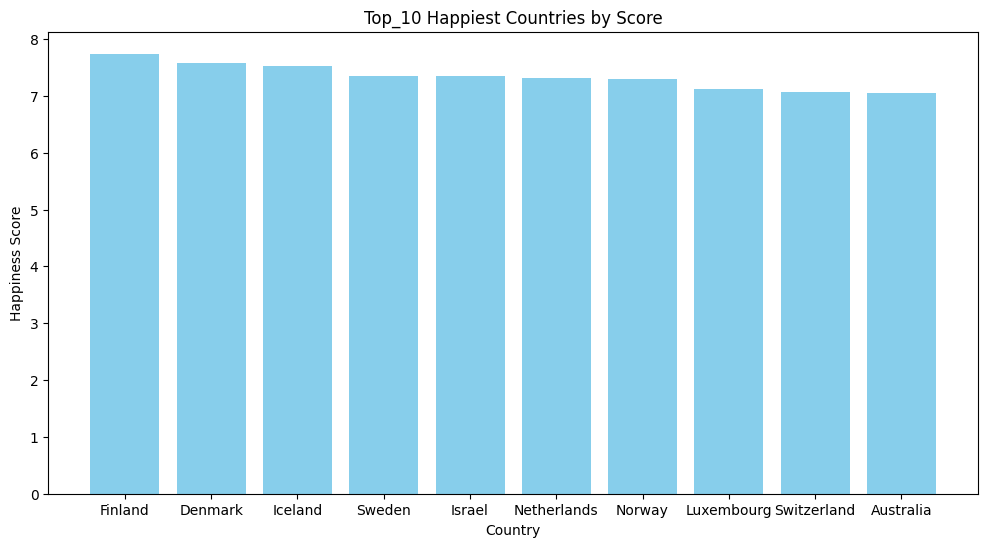

In [238]:
#2.1 barplot
top_10 = df.sort_values(by='score', ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(top_10['Country name'], top_10['score'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top_10 Happiest Countries by Score')
plt.savefig('top10_happiest.png', dpi=150)
plt.show()


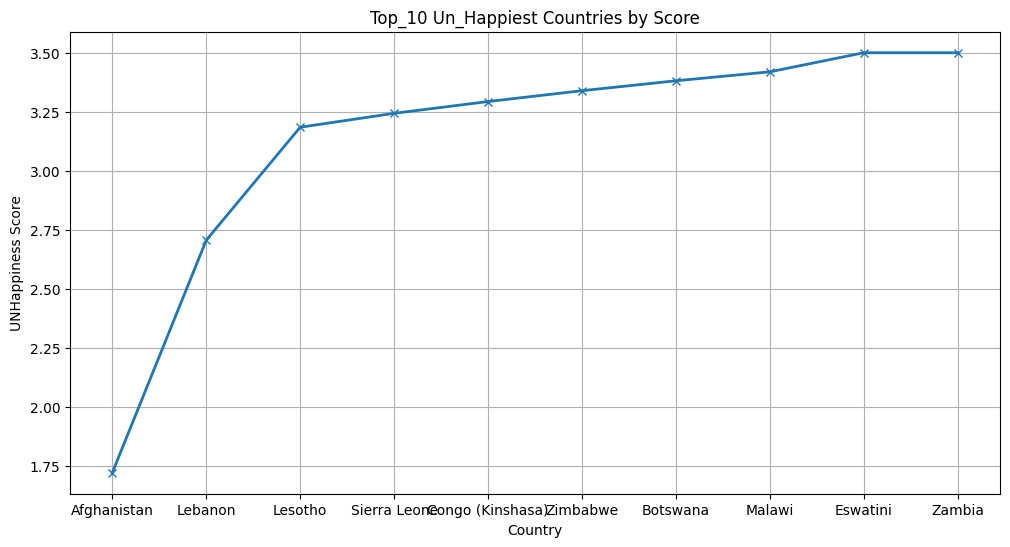

In [239]:
#2.2 lineplot
bottom_10 = df.sort_values(by='score', ascending=True).head(10)
plt.figure(figsize=(12,6))
plt.plot(bottom_10['Country name'], bottom_10['score'], marker='x', linewidth=2)
plt.xlabel('Country')
plt.ylabel('UNHappiness Score')
plt.title('Top_10 Un_Happiest Countries by Score')
plt.grid(True)
plt.savefig('top10_UN_happiest.png', dpi=150)
plt.show()


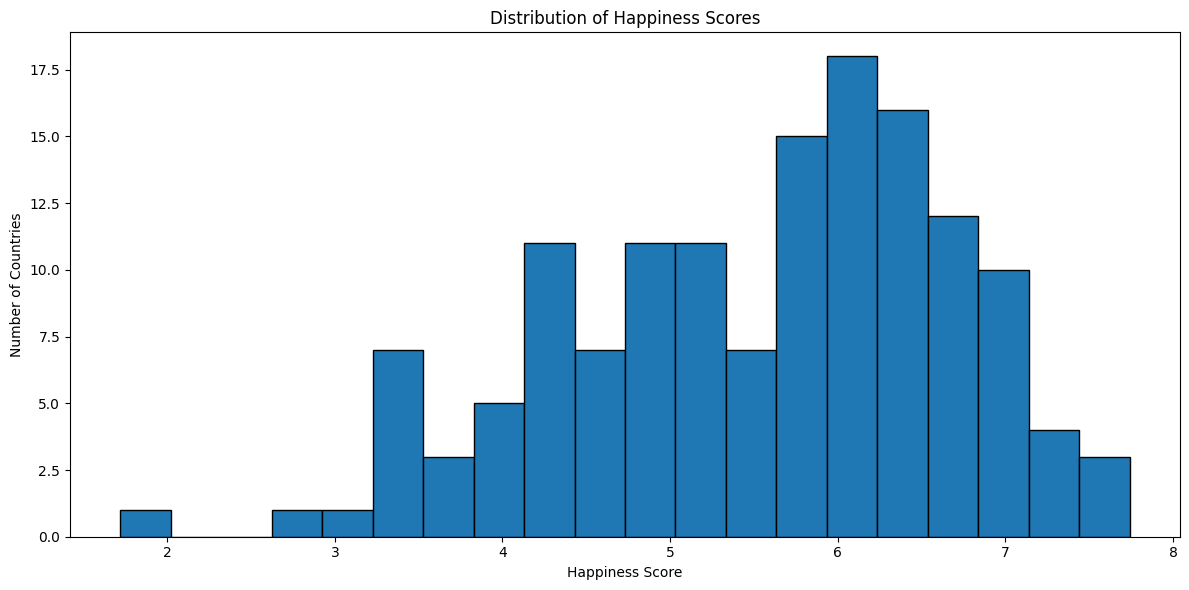

In [240]:
#3.3 histogram
plt.figure(figsize=(12,6))
plt.hist(df['score'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Happiness Score')
plt.ylabel('Number of Countries')
plt.title('Distribution of Happiness Scores')
plt.savefig('score_histogram.png', dpi=150)
plt.tight_layout()
plt.show()


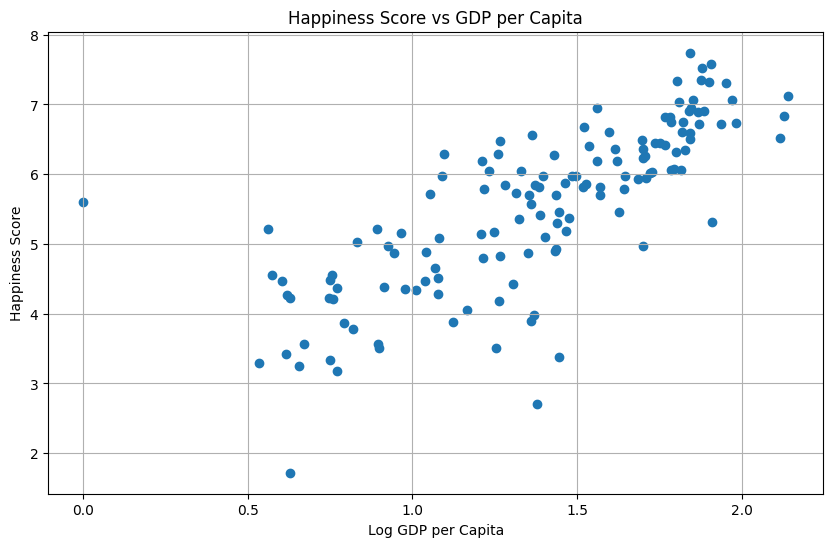

In [241]:
#q4 Scatterplot

plt.figure(figsize=(10,6))
plt.scatter(df['Log GDP per capita'], df['score'])
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs GDP per Capita')
plt.savefig('score_scatterplot.png', dpi=150)
plt.grid()
plt.show()


 3.1
  
Task - 1 - Setup Task - Preparing the South-Asia Dataset:

In [242]:
#3.1.1
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"]


In [243]:
#.3.1.2
south_asia_df = df[df['Country name'].isin(south_asian_countries)]


In [244]:
#3.1.3
south_asia_df.to_csv('south_asia.csv', index=False)
south_asia_df = south_asia_df.copy()

Task - 2 - Composite Score Ranking:

In [245]:
#3.2.1
south_asia_df['Composite_score']= (0.40 * south_asia_df['Log GDP per capita'] +
                                   0.30 * south_asia_df[ 'Social support'] +
                                   0.30 * south_asia_df['Healthy life expectancy'])

print(south_asia_df[['Country name', 'Composite_score']])
print(south_asia_df[['Healthy life expectancy', 'Composite_score']])
print(south_asia_df[['Social support', 'Composite_score']])



    Country name  Composite_score
92         Nepal           0.8159
107     Pakistan           0.7039
125        India           0.7874
127    Sri Lanka           1.0739
128   Bangladesh           0.6774
142  Afghanistan           0.3238
     Healthy life expectancy  Composite_score
92                     0.443           0.8159
107                    0.321           0.7039
125                    0.417           0.7874
127                    0.586           1.0739
128                    0.513           0.6774
142                    0.242           0.3238
     Social support  Composite_score
92            0.990           0.8159
107           0.600           0.7039
125           0.653           0.7874
127           1.179           1.0739
128           0.249           0.6774
142           0.000           0.3238


In [246]:
#3.2.2
ranked_descding_order = south_asia_df.sort_values(by='Composite_score', ascending=False)
print(ranked_descding_order[['Country name', 'Composite_score']])



    Country name  Composite_score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


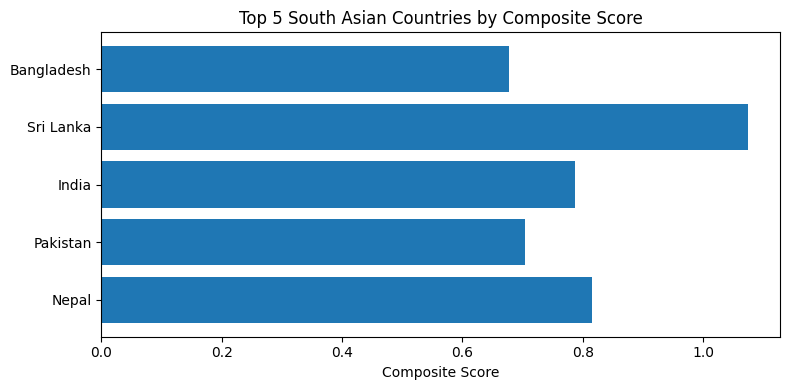

In [247]:
#visualzing top 5 country
top5_southasiacountry  = south_asia_df.head(5)
plt.figure(figsize=(8,4))
plt.barh(top5_southasiacountry['Country name'], top5_southasiacountry['Composite_score'])
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.savefig('comparetop5country.png', dpi=150)
plt.tight_layout()
plt.show()

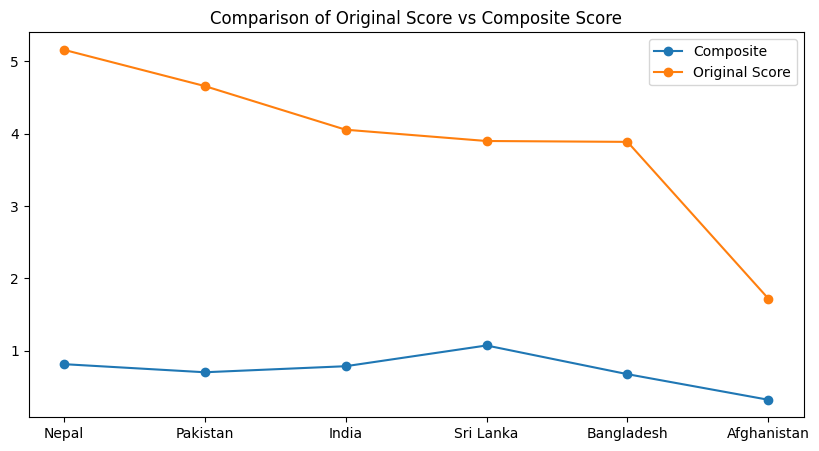

In [248]:
plt.figure(figsize=(10,5))
plt.plot(south_asia_df['Country name'], south_asia_df['Composite_score'], marker='o', label="Composite")
plt.plot(south_asia_df['Country name'], south_asia_df['score'], marker='o', label="Original Score")
plt.legend()
plt.title("Comparison of Original Score vs Composite Score")
plt.show()


Task - 3 - Outlier Detection:

In [249]:
#3.1
def find_outliers(column):
    Q1 = south_asia_df[column].quantile(0.25)
    Q3 = south_asia_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return south_asia_df[(south_asia_df[column] < lower) | (south_asia_df[column] > upper)]

outliers_score = find_outliers('score')
outliers_gdp = find_outliers('Log GDP per capita')





In [250]:
#3.2
print("UnHappiness Score by outliner country :")
print(south_asia_df.loc[outliers_score.index, ['Country name', 'score']])

print("\n Gdp by outliner country :")
print(south_asia_df.loc[outliers_gdp.index, ['Country name','Log GDP per capita']])


UnHappiness Score by outliner country :
    Country name  score
142  Afghanistan  1.721

 Gdp by outliner country :
    Country name  Log GDP per capita
142  Afghanistan               0.628


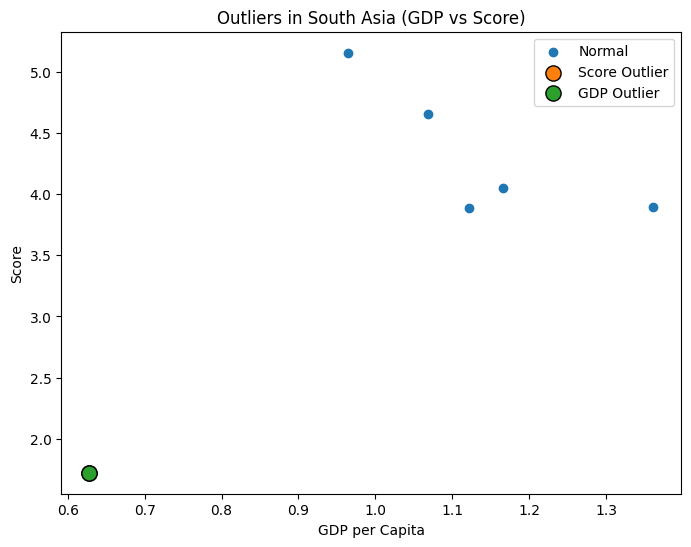

In [251]:
plt.figure(figsize=(8,6))

plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], label="Normal")

plt.scatter(outliers_score['Log GDP per capita'], outliers_score['score'],
            s=120, edgecolors="black", label="Score Outlier")

plt.scatter(outliers_gdp['Log GDP per capita'], outliers_gdp['score'],
            s=120, edgecolors="black", label="GDP Outlier")

plt.xlabel("GDP per Capita")
plt.ylabel("Score")
plt.title("Outliers in South Asia (GDP vs Score)")
plt.legend()
plt.show()


Task - 4 - Exploring Trends Across Metrics:


In [252]:
#4.1
correlation_freedom = south_asia_df['score'].corr(south_asia_df['Freedom to make life choices'])
correlation_generosity = south_asia_df['score'].corr(south_asia_df['Generosity'])

print(f"Pearson correlation: (score vs {'Freedom to make life choices'}): {correlation_freedom:.3f}")
print(f"\nPearson correlation: (score vs {'Generosity'}): {correlation_generosity:.3f}")

Pearson correlation: (score vs Freedom to make life choices): 0.801

Pearson correlation: (score vs Generosity): 0.875


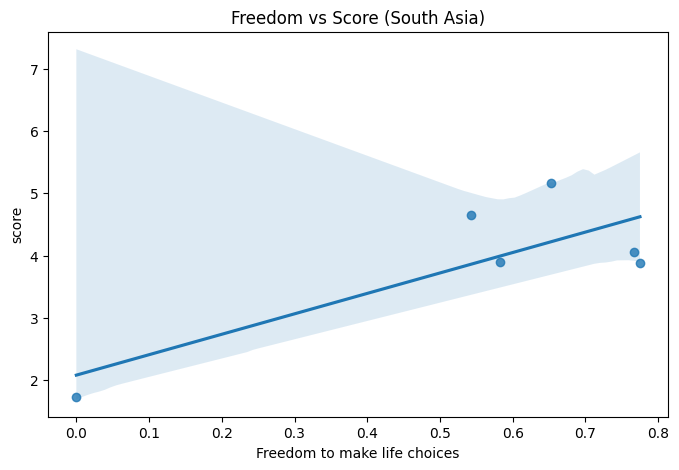

In [253]:
plt.figure(figsize=(8,5))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df)
plt.title("Freedom vs Score (South Asia)")
plt.show()

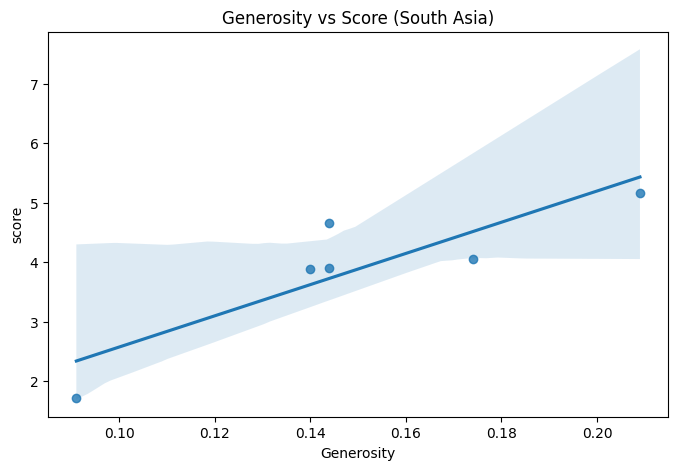

In [254]:
plt.figure(figsize=(8,5))
sns.regplot(x='Generosity', y='score', data=south_asia_df)
plt.title("Generosity vs Score (South Asia)")
plt.show()

In [255]:
corr_freedom = south_asia_df["Freedom to make life choices"].corr(south_asia_df["score"])
corr_generosity = south_asia_df["Generosity"].corr(south_asia_df["score"])

print("Correlation (Freedom vs Score):", corr_freedom)
print("Correlation (Generosity vs Score):", corr_generosity)

Correlation (Freedom vs Score): 0.8005185224163315
Correlation (Generosity vs Score): 0.874512371253192


Task - 5 - Gap Analysis:


In [256]:
#5.1
south_asia_df=south_asia_df.copy()
south_asia_df['GDP_Score_Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']
print(south_asia_df[['Country name','GDP_Score_Gap']])


    Country name  GDP_Score_Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
142  Afghanistan         -1.093


In [257]:
#5.2
# ascending order
gap_descending = south_asia_df.sort_values('GDP_Score_Gap', ascending=False).head(3)
print("Ascending order:\n")
print(gap_descending[['Country name', 'GDP_Score_Gap']])


# descending order
gap_descending = south_asia_df.sort_values('GDP_Score_Gap', ascending=True).head(3)
print("\nDescending order:\n")
print(gap_descending[['Country name', 'GDP_Score_Gap']])




Ascending order:

    Country name  GDP_Score_Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764

Descending order:

    Country name  GDP_Score_Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888


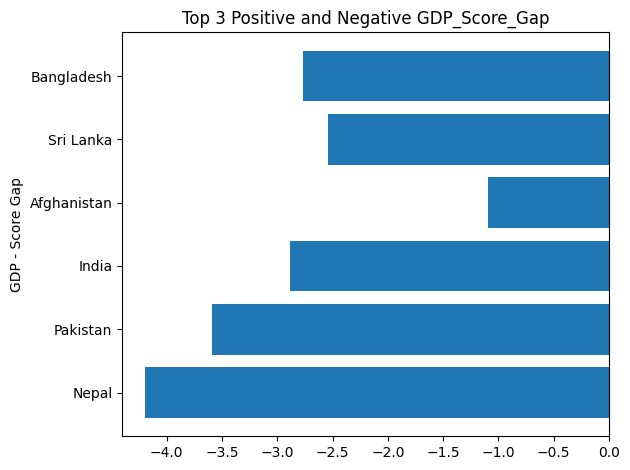

In [258]:
#5.3 top positive and negative comapre and using horizontal bargraph
top_positive = south_asia_df.sort_values('GDP_Score_Gap', ascending=False).head(3)
top_negative = south_asia_df.sort_values('GDP_Score_Gap', ascending=True).head(3)
top_gaps = pd.concat([top_negative, top_positive])
plt.barh(top_gaps['Country name'], top_gaps['GDP_Score_Gap'])
plt.ylabel('GDP - Score Gap')
plt.title('Top 3 Positive and Negative GDP_Score_Gap')
plt.tight_layout()
plt.show()


3.3 Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

In [259]:
middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

middle_east_df = df[df['Country name'].isin(middle_east_countries)]

middle_east_df.to_csv("Middle_East.csv", index=False)

In [260]:

# south_asia_df
mean_south_asia_country=south_asia_df['score'].mean()
devations_south_asia_country=south_asia_df['score'].std()
print("Mean score of southasia counter :",mean_south_asia_country)
print("\nStandard Devations of south asia country: " ,devations_south_asia_country)

# middle east mean

mean=middle_east_df['score'].mean()
devations=middle_east_df['score'].std()
print("\nMean score of middle east country :",mean)
print("\nStandard Devations of middle east country: " ,devations)


Mean score of southasia counter : 3.895666666666667

Standard Devations of south asia country:  1.1770690152521504

Mean score of middle east country : 5.412100000000001

Standard Devations of middle east country:  1.5662011684327144


In [261]:
# Compare
if mean_south_asia_country > mean:
    print("\nSouth Asia has higher happiness score on average.")
else:
    print("\nMiddle East has higher happiness score on average.")


Middle East has higher happiness score on average.


Top and Bottom Performers

In [262]:
#top3 south asia
top3_south_asia=south_asia_df[['Country name', 'score']].sort_values('score', ascending=False).head(3)
print("\nTop Three :",top3_south_asia)

# min value
botton_3_south_asia=south_asia_df[['Country name', 'score']].sort_values('score', ascending=True).head(3)
print("\n bottom 3:",botton_3_south_asia)

#  middle east top 3
top3_middle_east = middle_east_df[['Country name', 'score']].sort_values('score', ascending=False).head(3)
print("\nTop Three :",top3_middle_east)


#bottom 3
bottom_3= middle_east_df[['Country name','score']].sort_values('score', ascending=True).head(3)
print("\nbottom_3 :")
print(bottom_3)




Top Three :     Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

 bottom 3:     Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898

Top Three :             Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

bottom_3 :
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


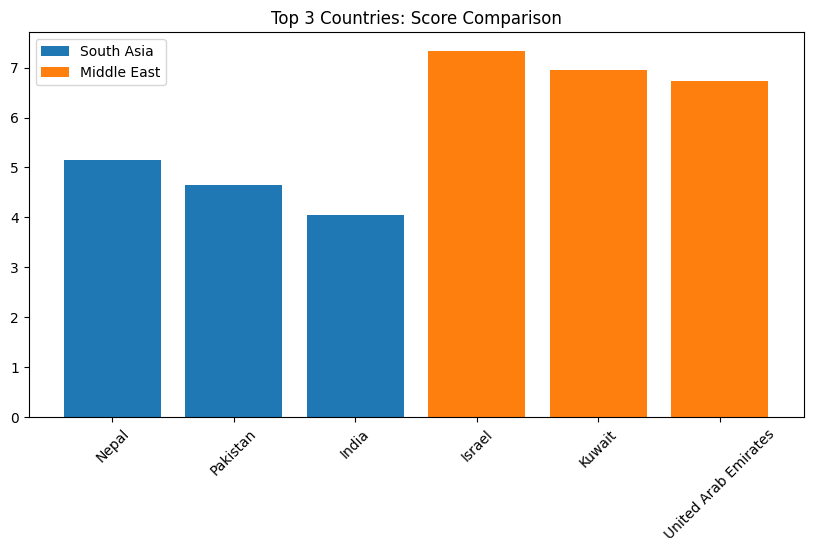

In [263]:
# bar plot comapre to them
sa_top = south_asia_df.nlargest(3, "score")
me_top = middle_east_df.nlargest(3, "score")
plt.figure(figsize=(10,5))
plt.bar(sa_top["Country name"], sa_top["score"], label="South Asia")
plt.bar(me_top["Country name"], me_top["score"], label="Middle East")
plt.title("Top 3 Countries: Score Comparison")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Metric Comparisons:

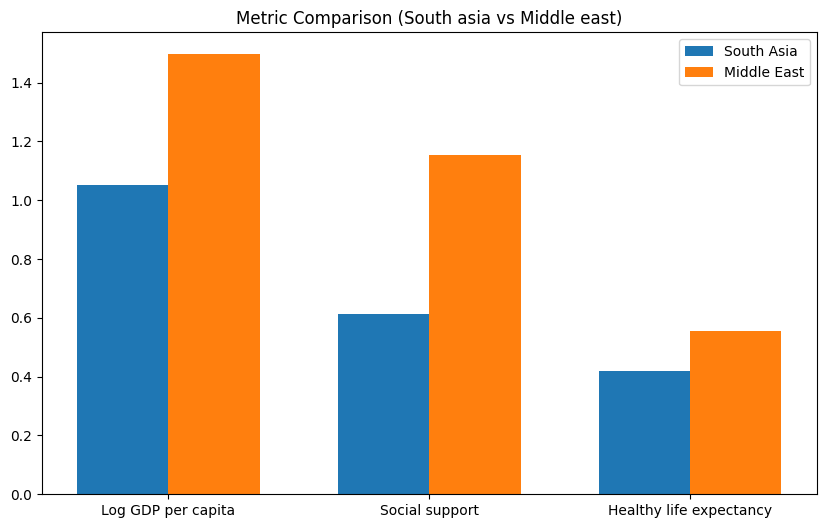

In [264]:

metrics = ["Log GDP per capita", "Social support", "Healthy life expectancy"]

sa_avg = south_asia_df[metrics].mean()
me_avg = middle_east_df[metrics].mean()

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, sa_avg, width, label="South Asia")
plt.bar(x + width/2, me_avg, width, label="Middle East")

plt.xticks(x, metrics)
plt.title("Metric Comparison (South asia vs Middle east)")
plt.legend()
plt.show()

Happiness Disparity:

In [265]:

def cv(series):
    return series.std() / series.mean()

print("South Asia Range:", south_asia_df["score"].max() - south_asia_df["score"].min())
print("Middle East Range:", middle_east_df["score"].max() - middle_east_df["score"].min())

print("\nSouth Asia CV:", cv(south_asia_df["score"]))
print("Middle East CV:", cv(middle_east_df["score"]))

South Asia Range: 3.4370000000000003
Middle East Range: 4.634

South Asia CV: 0.3021482883337427
Middle East CV: 0.28938880812119405


 Correlation Analysis:

In [266]:
corr_freedom_me = middle_east_df["Freedom to make life choices"].corr(middle_east_df["score"])
corr_generosity_me = middle_east_df["Generosity"].corr(middle_east_df["score"])

print("ME Correlation (Freedom vs Score):", corr_freedom_me)
print("ME Correlation (Generosity vs Score):", corr_generosity_me)

ME Correlation (Freedom vs Score): 0.8632202433827543
ME Correlation (Generosity vs Score): 0.6275236536964182


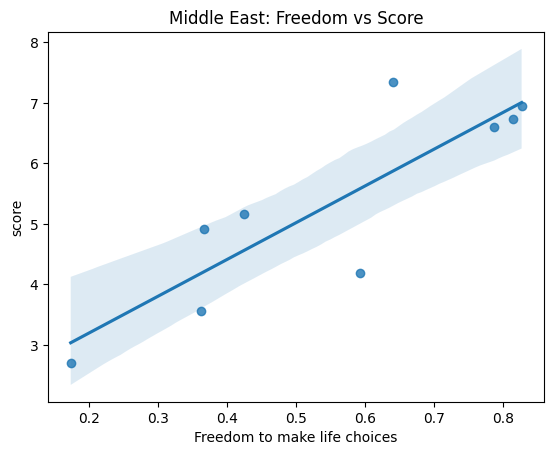

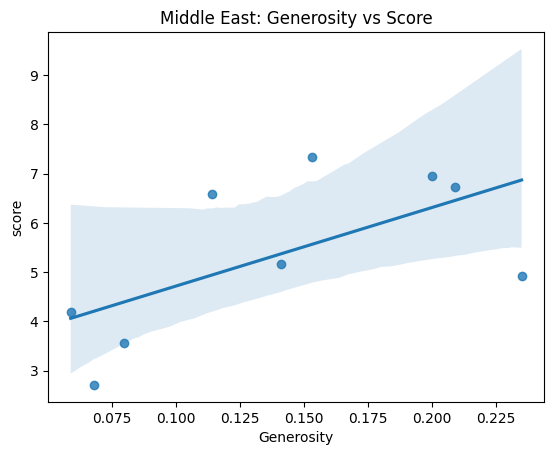

In [267]:
# bargraph
sns.regplot(x="Freedom to make life choices", y="score", data=middle_east_df)
plt.title("Middle East: Freedom vs Score")
plt.show()

sns.regplot(x="Generosity", y="score", data=middle_east_df)
plt.title("Middle East: Generosity vs Score")
plt.show()

Outlier Detection:

In [268]:
def find_outliers(column):
    Q1 = middle_east_df[column].quantile(0.25)
    Q3 = middle_east_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return middle_east_df[(middle_east_df[column] < lower) | (middle_east_df[column] > upper)]

me_out_score = find_outliers('score')
me_out_gdp = find_outliers('Log GDP per capita')

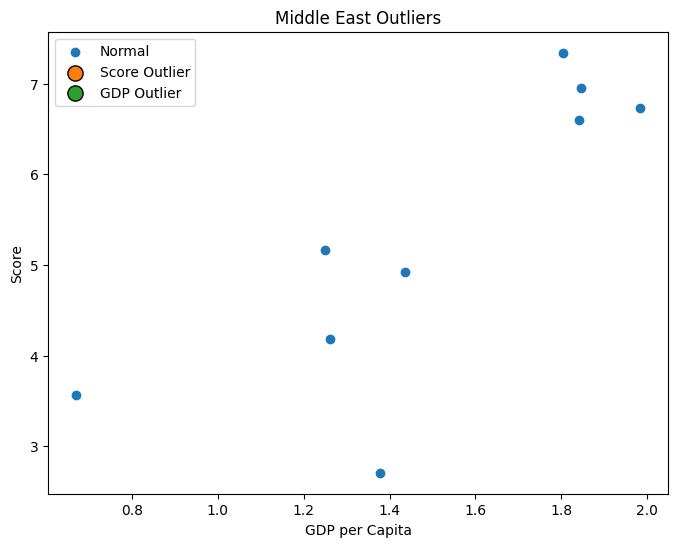

In [269]:
plt.figure(figsize=(8,6))
plt.scatter(middle_east_df['Log GDP per capita'], middle_east_df['score'], label="Normal")

plt.scatter(me_out_score['Log GDP per capita'], me_out_score['score'],
            s=120, edgecolors='black', label="Score Outlier")

plt.scatter(me_out_gdp['Log GDP per capita'], me_out_gdp['score'],
            s=120, edgecolors='black', label="GDP Outlier")

plt.xlabel("GDP per Capita")
plt.ylabel("Score")
plt.title("Middle East Outliers")
plt.legend()
plt.show()

Visualization:

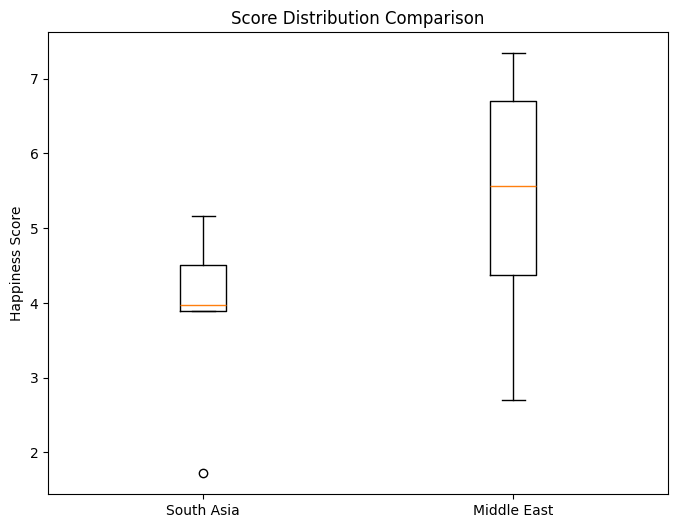

In [270]:
plt.figure(figsize=(8,6))
plt.boxplot([south_asia_df["score"], middle_east_df["score"]],
            tick_labels=["South Asia", "Middle East"])
plt.title("Score Distribution Comparison")
plt.ylabel("Happiness Score")
plt.show()
